# ***The preprocessing***

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('XIIOT.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820834 entries, 0 to 820833
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Date                         820503 non-null  object
 1   Timestamp                    820537 non-null  object
 2   Scr_IP                       820834 non-null  object
 3   Scr_port                     820834 non-null  object
 4   Des_IP                       820834 non-null  object
 5   Des_port                     820834 non-null  object
 6   Protocol                     820834 non-null  object
 7   Service                      820834 non-null  object
 8   Duration                     820834 non-null  object
 9   Scr_bytes                    820834 non-null  object
 10  Des_bytes                    820834 non-null  object
 11  Conn_state                   820834 non-null  int64 
 12  missed_bytes                 820834 non-null  object
 13  is_syn_only   

In [4]:
print(df['class1'].unique())
print(df['class2'].unique())
print(df['class3'].unique())

['Scanning_vulnerability' 'Normal' 'RDOS' 'Generic_scanning' 'BruteForce'
 'Discovering_resources' 'MQTT_cloud_broker_subscription' 'Exfiltration'
 'insider_malcious' 'Dictionary' 'Modbus_register_reading' 'Reverse_shell'
 'False_data_injection' 'fuzzing' 'TCP Relay' 'MitM' 'C&C'
 'Fake_notification' 'crypto-ransomware']
['Reconnaissance' 'Normal' 'RDOS' 'Weaponization' 'Lateral _movement'
 'Exfiltration' 'Exploitation' 'Tampering' 'C&C' 'crypto-ransomware']
['Attack' 'Normal']


In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
encoded_labels= label_encoder.fit_transform(df['class1'])
unique_classes = label_encoder.classes_

# print("Encoded Labels:",label_)
print("Mapping:")
links=[]
for original_label, encoded_label in zip(df['class1'], encoded_labels):
    v=f"{original_label} -> {encoded_label}"
    if v not in links:
        links.append(v)
    
print("Unique Classes:", unique_classes)

Mapping:
Unique Classes: ['BruteForce' 'C&C' 'Dictionary' 'Discovering_resources' 'Exfiltration'
 'Fake_notification' 'False_data_injection' 'Generic_scanning'
 'MQTT_cloud_broker_subscription' 'MitM' 'Modbus_register_reading'
 'Normal' 'RDOS' 'Reverse_shell' 'Scanning_vulnerability' 'TCP Relay'
 'crypto-ransomware' 'fuzzing' 'insider_malcious']


In [6]:
links

['Scanning_vulnerability -> 14',
 'Normal -> 11',
 'RDOS -> 12',
 'Generic_scanning -> 7',
 'BruteForce -> 0',
 'Discovering_resources -> 3',
 'MQTT_cloud_broker_subscription -> 8',
 'Exfiltration -> 4',
 'insider_malcious -> 18',
 'Dictionary -> 2',
 'Modbus_register_reading -> 10',
 'Reverse_shell -> 13',
 'False_data_injection -> 6',
 'fuzzing -> 17',
 'TCP Relay -> 15',
 'MitM -> 9',
 'C&C -> 1',
 'Fake_notification -> 5',
 'crypto-ransomware -> 16']

In [2]:
# func for missing values imputation, encoding, and normalization
from sklearn import preprocessing
import pandas as pd
import numpy as np
def Missing_handling(df):
  n=df.shape[1]
  for i in range(n):
      if df.iloc[:,i].isnull().sum()>0:
          if df.iloc[:,i].dtype == 'object':
              df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].mode()[0])
          else:
              df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].mean())
  return df

def encod(data):
  n=data.shape[1]
  from sklearn import preprocessing
  label_encoder = preprocessing.LabelEncoder()
  for i in range(n):
      if data.iloc[:,i].dtype == 'object':

        data.iloc[:,i]= label_encoder.fit_transform(data.iloc[:,i])
        unique_classes = label_encoder.classes_
        print("Unique Classes:", unique_classes)
        print("Encoded Labels:", data.iloc[:,i])
  return data


def normalize_scale(X):
  m= X.values #returns a numpy array
  cols_name = X.columns
  scaler = preprocessing.MinMaxScaler()
  x_scaled = scaler.fit_transform(m)
  Scale_X = pd.DataFrame(x_scaled,columns = cols_name)
  return Scale_X


In [6]:
df=df.drop(['Date','Timestamp'],axis=1)

In [7]:
df.isna().sum()

Scr_IP                         0
Scr_port                       0
Des_IP                         0
Des_port                       0
Protocol                       0
                              ..
read_write_physical.process    0
is_privileged                  0
class1                         0
class2                         0
class3                         0
Length: 66, dtype: int64

In [239]:
df=encod(df)
df

,Scr_IP,Des_pkts_ratio,Scr_port,Des_port,Avg_num_Proc/s,Std_num_proc/s,Des_IP,is_privileged,read_write_physical.process,Service,...,Avg_kbmemused,read_write_physical.process.1,File_activity,is_pure_ack,Des_IP.2,Des_bytes_ratio,Conn_state,class1,class2,class3
0,22,468,22289,1195,47,107,61,0,1,8,...,18886,1,0,True,61,107,1,6,7,0
1,22,0,40460,6020,858,2573,66,1,0,4,...,17431,0,1,True,66,0,1,4,1,0
2,14,1,36704,4973,79,135,51,0,0,2,...,13061,0,0,False,51,1,1,3,6,0
3,16,1325,18396,4973,59,164,51,0,0,2,...,11997,0,0,False,51,5441,1,11,4,1
4,7,239,37914,1959,29,175,54,1,0,14,...,13704,0,0,True,54,3860,0,15,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004183,22,42,36633,6020,283,2616,66,1,0,4,...,24244,0,1,True,66,36,1,4,1,0
1004184,22,477,23880,1195,57,32,61,0,1,8,...,7488,1,0,True,61,107,1,6,7,0
1004185,25,6530,22158,1599,591,1290,63,0,0,15,...,18456,0,0,True,63,10457,1,2,8,0
1004186,13,1,23332,5213,5,14,51,0,1,0,...,25772,1,0,False,51,1,1,12,5,0


In [15]:
# saving the processed dataframe
df.to_csv('XIIOT_enoded.csv',index=False)

In [17]:
# uploading the file again.
df=pd.read_csv('XIIOT_enoded.csv',low_memory=False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820834 entries, 0 to 820833
Data columns (total 66 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Scr_IP                       820834 non-null  int64
 1   Scr_port                     820834 non-null  int64
 2   Des_IP                       820834 non-null  int64
 3   Des_port                     820834 non-null  int64
 4   Protocol                     820834 non-null  int64
 5   Service                      820834 non-null  int64
 6   Duration                     820834 non-null  int64
 7   Scr_bytes                    820834 non-null  int64
 8   Des_bytes                    820834 non-null  int64
 9   Conn_state                   820834 non-null  int64
 10  missed_bytes                 820834 non-null  int64
 11  is_syn_only                  820834 non-null  bool 
 12  Is_SYN_ACK                   820834 non-null  bool 
 13  is_pure_ack                  

In [20]:
df['class1'].value_counts()

class1
11    421417
12    141261
14     52852
7      50277
0      47241
8      23524
3      23148
4      22134
18     17447
10      5953
6       5094
1       2863
2       2572
15      2119
17      1313
13      1016
16       458
9        117
5         28
Name: count, dtype: int64

In [21]:
#handling data imbalance problem using SMOTE and RandomUnderSampler and saving the dataframe

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# Apply MOTE for upsampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
Concat_all=[]
for i in range(19):
    if i == 14:
        temp = df[df['class1'].isin([i])]
        Concat_all.append(temp)

        # temp.to_csv(f'class1{i}.csv',index=False)

    else:

        print(i)
        temp = df[df['class1'].isin([14,i])]

        count1= temp[temp['class1'].isin([i])].shape[0]
        count2= temp[temp['class1'].isin([14])].shape[0]

        if count1<count2:
            X, y = smote.fit_resample(temp.drop(['class1'],axis=1), temp['class1'])
            print(y.value_counts())
            temp=pd.concat([X,y],axis=1)

            temp = temp[temp['class1'].isin([i])]
            Concat_all.append(temp)

        else:
            X, y = rus.fit_resample(temp.drop(['class1'],axis=1), temp['class1'])
            print(y.value_counts())
            temp=pd.concat([X,y],axis=1)

            temp = temp[temp['class1'].isin([i])]

            Concat_all.append(temp)
            


Concat_all=pd.concat(Concat_all,axis=0)
Concat_all=Concat_all.sample(frac=1,random_state=42)
Concat_all=Concat_all.reset_index(drop=True)
Concat_all.to_csv('XIIOT_sampled.csv',index=False)

0
class1
14    52852
0     52852
Name: count, dtype: int64
1
class1
14    52852
1     52852
Name: count, dtype: int64
2
class1
14    52852
2     52852
Name: count, dtype: int64
3
class1
14    52852
3     52852
Name: count, dtype: int64
4
class1
14    52852
4     52852
Name: count, dtype: int64
5
class1
14    52852
5     52852
Name: count, dtype: int64
6
class1
14    52852
6     52852
Name: count, dtype: int64
7
class1
14    52852
7     52852
Name: count, dtype: int64
8
class1
14    52852
8     52852
Name: count, dtype: int64
9
class1
14    52852
9     52852
Name: count, dtype: int64
10
class1
14    52852
10    52852
Name: count, dtype: int64
11
class1
11    52852
14    52852
Name: count, dtype: int64
12
class1
12    52852
14    52852
Name: count, dtype: int64
13
class1
14    52852
13    52852
Name: count, dtype: int64
15
class1
14    52852
15    52852
Name: count, dtype: int64
16
class1
14    52852
16    52852
Name: count, dtype: int64
17
class1
14    52852
17    52852
Name: count, dty

In [1]:
# uploading the sampled dataframe
df=pd.read_csv('XIIOT_sampled.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004188 entries, 0 to 1004187
Data columns (total 66 columns):
 #   Column                       Non-Null Count    Dtype
---  ------                       --------------    -----
 0   Scr_IP                       1004188 non-null  int64
 1   Scr_port                     1004188 non-null  int64
 2   Des_IP                       1004188 non-null  int64
 3   Des_port                     1004188 non-null  int64
 4   Protocol                     1004188 non-null  int64
 5   Service                      1004188 non-null  int64
 6   Duration                     1004188 non-null  int64
 7   Scr_bytes                    1004188 non-null  int64
 8   Des_bytes                    1004188 non-null  int64
 9   Conn_state                   1004188 non-null  int64
 10  missed_bytes                 1004188 non-null  int64
 11  is_syn_only                  1004188 non-null  bool 
 12  Is_SYN_ACK                   1004188 non-null  bool 
 13  is_pure_ack 

In [3]:
# fearture selection for class3
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalize_scale(df.drop(['class1','class2','class3'],axis=1)),df['class3'], test_size=0.2, random_state=42)

# Create a random forest classifier
#clf = RandomForestClassifier(random_state=42)
# kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# clf = SVC(kernel='linear', C=1.0, random_state=42)
clf=DecisionTreeClassifier()

# Define a function for evaluating a set of features using cross-validation
def evaluate_features(clf,features,X_train,y_train,y_test):
    clf.fit(X_train.iloc[:,features], y_train)
    y_pred = clf.predict(X_test.iloc[:, features])
    return accuracy_score(y_test, y_pred)

# Perform wrapper feature selection
num_features = X_train.shape[1]
selected_features = []
best_accuracy = 0

for _ in range(num_features):
    best_feature = None
    for feature in range(num_features):
        if feature not in selected_features:
            current_features = selected_features + [feature]
            print(current_features)
            accuracy = evaluate_features(clf,current_features,X_train,y_train,y_test)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature
    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Selected feature {best_feature}")
    else:
        print(f"Selected feature {best_feature}")
        break

print("Selected features:", selected_features)


[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
Selected feature 0
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[0, 7]
[0, 8]
[0, 9]
[0, 10]
[0, 11]
[0, 12]
[0, 13]
[0, 14]
[0, 15]
[0, 16]
[0, 17]
[0, 18]
[0, 19]
[0, 20]
[0, 21]
[0, 22]
[0, 23]
[0, 24]
[0, 25]
[0, 26]
[0, 27]
[0, 28]
[0, 29]
[0, 30]
[0, 31]
[0, 32]
[0, 33]
[0, 34]
[0, 35]
[0, 36]
[0, 37]
[0, 38]
[0, 39]
[0, 40]
[0, 41]
[0, 42]
[0, 43]
[0, 44]
[0, 45]
[0, 46]
[0, 47]
[0, 48]
[0, 49]
[0, 50]
[0, 51]
[0, 52]
[0, 53]
[0, 54]
[0, 55]
[0, 56]
[0, 57]
[0, 58]
[0, 59]
[0, 60]
[0, 61]
[0, 62]
Selected feature 28
[0, 28, 1]
[0, 28, 2]
[0, 28, 3]
[0, 28, 4]
[0, 28, 5]
[0, 28, 6]
[0, 28, 7]
[0, 28, 8]
[0, 28, 9]
[0, 28, 10]
[0, 28, 11]
[0, 28, 12]
[0, 28, 13]
[0, 28, 14]
[0, 28, 15

In [4]:
print('attack Selected features:', df.iloc[:,selected_features].columns)

attack Selected features: Index(['Scr_IP', 'Des_pkts_ratio', 'Scr_port', 'Des_port', 'Avg_num_Proc/s',
       'Avg_nice_time', 'Std_num_proc/s', 'Des_IP',
       'read_write_physical.process', 'Avg_system_time', 'Avg_user_time',
       'Protocol'],
      dtype='object')


In [5]:
# feature selection for class2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalize_scale(df.drop(['class1','class2','class3'],axis=1)),df['class2'], test_size=0.2, random_state=42)

# Create a random forest classifier
clf = RandomForestClassifier(random_state=42)

# Define a function for evaluating a set of features using cross-validation
def evaluate_features(clf,features,X_train,y_train,y_test):
    clf.fit(X_train.iloc[:,features], y_train)
    y_pred = clf.predict(X_test.iloc[:, features])
    return accuracy_score(y_test, y_pred)

# Perform wrapper feature selection
num_features = X_train.shape[1]
selected_features = []
best_accuracy = 0

for _ in range(num_features):
    best_feature = None
    for feature in range(num_features):
        if feature not in selected_features:
            current_features = selected_features + [feature]
            print(current_features)
            accuracy = evaluate_features(clf,current_features,X_train,y_train,y_test)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature
    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Selected feature {best_feature}")
    else:
        print(f"Selected feature {best_feature}")
        break

print("Selected features:", selected_features)


[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
Selected feature 3
[3, 0]
[3, 1]
[3, 2]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[3, 10]
[3, 11]
[3, 12]
[3, 13]
[3, 14]
[3, 15]
[3, 16]
[3, 17]
[3, 18]
[3, 19]
[3, 20]
[3, 21]
[3, 22]
[3, 23]
[3, 24]
[3, 25]
[3, 26]
[3, 27]
[3, 28]
[3, 29]
[3, 30]
[3, 31]
[3, 32]
[3, 33]
[3, 34]
[3, 35]
[3, 36]
[3, 37]
[3, 38]
[3, 39]
[3, 40]
[3, 41]
[3, 42]
[3, 43]
[3, 44]
[3, 45]
[3, 46]
[3, 47]
[3, 48]
[3, 49]
[3, 50]
[3, 51]
[3, 52]
[3, 53]
[3, 54]
[3, 55]
[3, 56]
[3, 57]
[3, 58]
[3, 59]
[3, 60]
[3, 61]
[3, 62]
Selected feature 6
[3, 6, 0]
[3, 6, 1]
[3, 6, 2]
[3, 6, 4]
[3, 6, 5]
[3, 6, 7]
[3, 6, 8]
[3, 6, 9]
[3, 6, 10]
[3, 6, 11]
[3, 6, 12]
[3, 6, 13]
[3, 6, 14]
[3, 6, 15]
[3, 6, 16]
[3, 6, 17]
[3

In [6]:
print('category features:', df.iloc[:,selected_features].columns)


category features: Index(['Des_port', 'Duration', 'Scr_ip_bytes', 'Scr_IP', 'Std_num_proc/s',
       'Scr_port', 'Avg_num_Proc/s', 'Des_bytes_ratio', 'Scr_bytes',
       'is_syn_only', 'paket_rate', 'anomaly_alert', 'Service', 'total_packet',
       'Avg_rtps', 'Login_attempt', 'Des_pkts', 'byte_rate'],
      dtype='object')


In [3]:
category_selected_features=['Des_port', 'Duration', 'Scr_ip_bytes', 'Scr_IP', 'Std_num_proc/s',
       'Scr_port', 'Avg_num_Proc/s', 'Des_IP', 'anomaly_alert', 'Is_SYN_ACK',
       'Scr_bytes', 'Des_pkts', 'is_SYN_with_RST']

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

# Load the dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalize_scale(df.drop(['class1','class2','class3'],axis=1)),df['class1'], test_size=0.2, random_state=42)

# Create a random forest classifier
clf = RandomForestClassifier(random_state=42)


# Define a function for evaluating a set of features using cross-validation
def evaluate_features(clf,features,X_train,y_train,y_test):
    clf.fit(X_train.iloc[:,features], y_train)
    y_pred = clf.predict(X_test.iloc[:, features])
    return accuracy_score(y_test, y_pred)

# Perform wrapper feature selection
num_features = X_train.shape[1]
selected_features = []
best_accuracy = 0

for _ in range(num_features):
    best_feature = None
    for feature in range(num_features):
        if feature not in selected_features:
            current_features = selected_features + [feature]
            print(current_features)
            accuracy = evaluate_features(clf,current_features,X_train,y_train,y_test)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature
    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Selected feature {best_feature}")
    else:
        print(f"Selected feature {best_feature}")
        break

print("Selected features:", selected_features)


[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
Selected feature 19
[19, 0]
[19, 1]
[19, 2]
[19, 3]
[19, 4]
[19, 5]
[19, 6]
[19, 7]
[19, 8]
[19, 9]
[19, 10]
[19, 11]
[19, 12]
[19, 13]
[19, 14]
[19, 15]
[19, 16]
[19, 17]
[19, 18]
[19, 20]
[19, 21]
[19, 22]
[19, 23]
[19, 24]
[19, 25]
[19, 26]
[19, 27]
[19, 28]
[19, 29]
[19, 30]
[19, 31]
[19, 32]
[19, 33]
[19, 34]
[19, 35]
[19, 36]
[19, 37]
[19, 38]
[19, 39]
[19, 40]
[19, 41]
[19, 42]
[19, 43]
[19, 44]
[19, 45]
[19, 46]
[19, 47]
[19, 48]
[19, 49]
[19, 50]
[19, 51]
[19, 52]
[19, 53]
[19, 54]
[19, 55]
[19, 56]
[19, 57]
[19, 58]
[19, 59]
[19, 60]
[19, 61]
[19, 62]
Selected feature 3
[19, 3, 0]
[19, 3, 1]
[19, 3, 2]
[19, 3, 4]
[19, 3, 5]
[19, 3, 6]
[19, 3, 7]
[19, 3, 8]
[19, 3, 9]
[19, 3, 1

In [11]:
print('type selected features:', df.iloc[:,selected_features].columns)

type selected features: Index(['Scr_ip_bytes', 'Des_port', 'Std_num_proc/s', 'Scr_IP', 'Duration',
       'Avg_system_time', 'Scr_bytes_ratio', 'Avg_ideal_time', 'Scr_port',
       'Avg_num_Proc/s', 'Conn_state', 'Std_rtps', 'Des_pkts', 'Std_user_time',
       'std_num_cswch/s'],
      dtype='object')


In [4]:
subcategory_selected_features=['Scr_ip_bytes', 'Des_port', 'Std_num_proc/s', 'Scr_IP', 'Duration',
       'Avg_system_time', 'Scr_bytes_ratio', 'Avg_ideal_time', 'Scr_port',
       'Avg_num_Proc/s', 'Conn_state', 'Std_rtps', 'Des_pkts', 'Std_user_time',
       'std_num_cswch/s']

In [6]:
#saving the dataset only with the require features 
sf=attack_selected_features+category_selected_features+subcategory_selected_features+ ['class1','class2','class3']
df[sf].to_csv('XIIOTID_selected.csv', index=False)

# Uploading the Dataset with only require features

In [15]:
import pandas as pd
import numpy as np
data=pd.read_csv('XIIOTID_selected.csv',low_memory=False)

In [16]:
data

,Scr_IP,Des_pkts_ratio,Scr_port,Des_port,Avg_num_Proc/s,Std_num_proc/s,Des_IP,is_privileged,read_write_physical.process,Service,...,Avg_kbmemused,read_write_physical.process.1,File_activity,is_pure_ack,Des_IP.2,Des_bytes_ratio,Conn_state,class1,class2,class3
0,22,468,22289,1195,47,107,61,0,1,8,...,18886,1,0,True,61,107,1,6,7,0
1,22,0,40460,6020,858,2573,66,1,0,4,...,17431,0,1,True,66,0,1,4,1,0
2,14,1,36704,4973,79,135,51,0,0,2,...,13061,0,0,False,51,1,1,3,6,0
3,16,1325,18396,4973,59,164,51,0,0,2,...,11997,0,0,False,51,5441,1,11,4,1
4,7,239,37914,1959,29,175,54,1,0,14,...,13704,0,0,True,54,3860,0,15,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004183,22,42,36633,6020,283,2616,66,1,0,4,...,24244,0,1,True,66,36,1,4,1,0
1004184,22,477,23880,1195,57,32,61,0,1,8,...,7488,1,0,True,61,107,1,6,7,0
1004185,25,6530,22158,1599,591,1290,63,0,0,15,...,18456,0,0,True,63,10457,1,2,8,0
1004186,13,1,23332,5213,5,14,51,0,1,0,...,25772,1,0,False,51,1,1,12,5,0


# AE for Attack Label

In [17]:
attack_selected_features=['Scr_IP', 'Des_pkts_ratio', 'Scr_port', 'Des_port', 'Avg_num_Proc/s',
       'Std_num_proc/s', 'Des_IP', 'is_privileged',
       'read_write_physical.process', 'Service', 'Avg_system_time', 'Des_pkts',
       'OSSEC_alert_level', 'Avg_nice_time', 'Succesful_login']


category_selected_features=['Des_port', 'Duration', 'Scr_ip_bytes', 'Scr_IP', 'Std_num_proc/s',
       'Scr_port', 'Avg_num_Proc/s', 'Des_IP', 'anomaly_alert', 'Is_SYN_ACK',
       'Scr_bytes', 'Des_pkts', 'is_SYN_with_RST']

subcategory_selected_features=['Scr_ip_bytes', 'Des_port', 'Std_num_proc/s', 'Scr_IP', 'Duration',
       'Avg_system_time', 'Des_pkts_ratio', 'Std_iowait_time', 'Scr_port',
       'Avg_num_Proc/s', 'Avg_kbmemused', 'read_write_physical.process',
       'File_activity', 'is_pure_ack', 'Des_IP', 'Des_bytes_ratio',
       'Conn_state']

In [18]:
# @title
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
def normalize_scale (X):
  m= X.values #returns a numpy array
  cols_name = X.columns
  scaler = preprocessing.MinMaxScaler()
  x_scaled = scaler.fit_transform(m)
  Scale_X = pd.DataFrame(x_scaled,columns = cols_name)
  return Scale_X

In [19]:
X_train, X_test, y_train, y_test = train_test_split(normalize_scale(data[attack_selected_features]),data['class3'], test_size=0.2, random_state=42)
X_train.shape, y_train.unique() 

((803350, 15), array([0, 1], dtype=int64))

In [20]:
#for selected_for_attack.csv
import numpy as np#for selected_for_attack.csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define the sparse autoencoder
input_data = Input(shape=(15,), name='attack_input')
encoded = Dense(12, activation='relu', activity_regularizer=regularizers.l1(10e-5),name='attack_encoder')(input_data)
decoded = Dense(15, activation='sigmoid',name='attack_decoder')(encoded)
sparse_autoencoder = Model(input_data, decoded)
sparse_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

sparse_autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 attack_input (InputLayer)   [(None, 15)]              0         
                                                                 
 attack_encoder (Dense)      (None, 12)                192       
                                                                 
 attack_decoder (Dense)      (None, 15)                195       
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


In [206]:
early_stopping = EarlyStopping(monitor='val_loss',  patience=10, restore_best_weights=False)

modelcheckpoint=ModelCheckpoint('AE_for_Aattack.h5', monitor='val_loss', verbose=0, save_best_only=True)

history1=sparse_autoencoder.fit(X_train, X_train, validation_split=0.3, epochs=100,callbacks=[modelcheckpoint,early_stopping], batch_size=64, verbose=1)

Epoch 1/100
8787/8787 [==============================] - 64s 7ms/step - loss: 9.6829e-04 - val_loss: 9.9223e-04
Epoch 2/100
8787/8787 [==============================] - 64s 7ms/step - loss: 9.6791e-04 - val_loss: 9.6802e-04
Epoch 3/100
8787/8787 [==============================] - 65s 7ms/step - loss: 9.6747e-04 - val_loss: 9.9760e-04
Epoch 4/100
8787/8787 [==============================] - 58s 7ms/step - loss: 9.6740e-04 - val_loss: 9.6278e-04
Epoch 5/100
8787/8787 [==============================] - 60s 7ms/step - loss: 9.6624e-04 - val_loss: 9.6957e-04
Epoch 6/100
8787/8787 [==============================] - 58s 7ms/step - loss: 9.6580e-04 - val_loss: 9.7490e-04
Epoch 7/100
8787/8787 [==============================] - 60s 7ms/step - loss: 9.6633e-04 - val_loss: 9.7084e-04
Epoch 8/100
8787/8787 [==============================] - 61s 7ms/step - loss: 9.6571e-04 - val_loss: 9.7282e-04
Epoch 9/100
8787/8787 [==============================] - 62s 7ms/step - loss: 9.6526e-04 - val_loss: 9.7

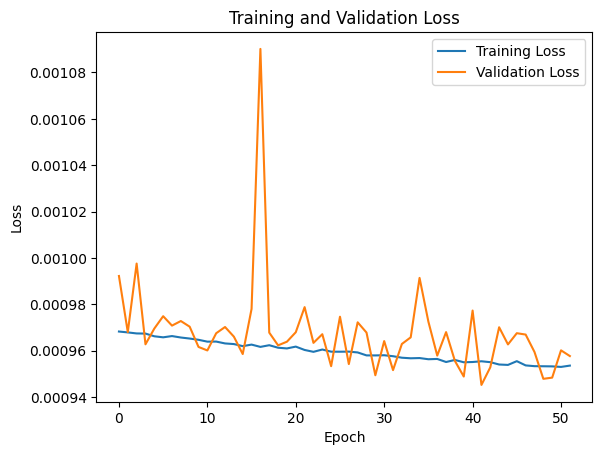

In [219]:
import matplotlib.pyplot as plt
# Plot training and validation loss over epochs
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
re_construct=sparse_autoencoder.predict(X_test)
mse = mean_squared_error(re_construct, X_test)
print("Mean Squared Error:", mse)
r2 = r2_score(re_construct, X_test)
print("R-squared:", r2)

6277/6277 [==============================] - 13s 2ms/step
Mean Squared Error: 0.0012277047122447866
R-squared: 0.9702869856542783


# AE for Category class

In [211]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('XIIOTID_selected.csv',low_memory=False)

X_train, X_test, y_train, y_test = train_test_split(normalize_scale(df[category_selected_features]),df['class2'], test_size=0.2, random_state=42)
# X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)
X_train.shape


(803350, 13)

In [212]:
#for selected_for_attack.csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define the sparse autoencoder
input_data = Input(shape=(13,),name='category_input')
encoded = Dense(10, activation='relu', name='category_encoder', activity_regularizer=regularizers.l1(10e-5))(input_data)
decoded = Dense(13, activation='sigmoid',name='category_decoder')(encoded)
sparse_autoencoder = Model(input_data, decoded)
sparse_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

sparse_autoencoder.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 category_input (InputLayer)  [(None, 13)]             0         
                                                                 
 category_encoder (Dense)    (None, 10)                140       
                                                                 
 category_decoder (Dense)    (None, 13)                143       
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


In [213]:


early_stopping = EarlyStopping(monitor='val_loss',  patience=10, restore_best_weights=False)

modelcheckpoint=ModelCheckpoint('AE_for_category.h5', monitor='val_loss', verbose=0, save_best_only=True)

history2=sparse_autoencoder.fit(X_train, X_train, validation_split=0.3, epochs=100,callbacks=[modelcheckpoint,early_stopping], batch_size=64, verbose=1)

Epoch 1/100
8787/8787 [==============================] - 62s 7ms/step - loss: 0.0097 - val_loss: 0.0033
Epoch 2/100
8787/8787 [==============================] - 59s 7ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 3/100
8787/8787 [==============================] - 58s 7ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 4/100
8787/8787 [==============================] - 59s 7ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 5/100
8787/8787 [==============================] - 59s 7ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 6/100
8787/8787 [==============================] - 57s 7ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 7/100
8787/8787 [==============================] - 59s 7ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 8/100
8787/8787 [==============================] - 59s 7ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 9/100
8787/8787 [==============================] - 58s 7ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 10/100
8787/8787 [==============================] - 56s 6m

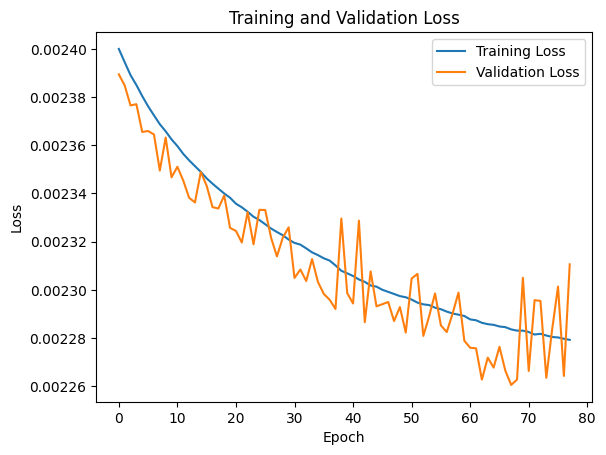

In [220]:
# Plot training and validation loss over epochs
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'][20:], label='Training Loss')
plt.plot(history2.history['val_loss'][20:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [29]:
from keras.models import load_model
sparse_autoencoder = load_model('AE_for_category.h5')
sparse_autoencoder.evaluate(X_test,X_test)

6277/6277 [==============================] - 33s 5ms/step - loss: 0.0016


0.0015575793804600835

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
re_construct=sparse_autoencoder.predict(X_test)
mse = mean_squared_error(re_construct, X_test)
print("Mean Squared Error:", mse)
r2 = r2_score(re_construct, X_test)
print("R-squared:", r2)

6277/6277 [==============================] - 16s 2ms/step
Mean Squared Error: 0.0014042253114466474
R-squared: 0.7344364010969215


# AE for Sub-category class

In [215]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('XIIOTID_selected.csv',low_memory=False)

X_train, X_test, y_train, y_test = train_test_split(normalize_scale(df[subcategory_selected_features]),df['class1'], test_size=0.2, random_state=42)
# X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)
X_train.shape


(803350, 17)

In [56]:
df['class1'].value_counts()

class1
6     52852
2     52852
0     52852
1     52852
8     52852
13    52852
17    52852
9     52852
5     52852
16    52852
4     52852
14    52852
18    52852
10    52852
12    52852
15    52852
11    52852
3     52852
7     52852
Name: count, dtype: int64

In [216]:
#for selected_for_attack.csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define the sparse autoencoder
input_data = Input(shape=(17,),name='subcategory_input')
encoded = Dense(14, activation='relu', name='subcategory_encoder', activity_regularizer=regularizers.l1(10e-5))(input_data)
decoded = Dense(17, activation='sigmoid', name='subcategory_decoder')(encoded)
sparse_autoencoder = Model(input_data, decoded)
sparse_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

sparse_autoencoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 subcategory_input (InputLay  [(None, 17)]             0         
 er)                                                             
                                                                 
 subcategory_encoder (Dense)  (None, 14)               252       
                                                                 
 subcategory_decoder (Dense)  (None, 17)               255       
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________


In [217]:

early_stopping = EarlyStopping(monitor='val_loss',  patience=10, restore_best_weights=False)

modelcheckpoint=ModelCheckpoint('AE_for_subcategory.h5', monitor='val_loss', verbose=0, save_best_only=True)

history3=sparse_autoencoder.fit(X_train, X_train, validation_split=0.3, epochs=100,callbacks=[modelcheckpoint,early_stopping], batch_size=64, verbose=1)

Epoch 1/100
8787/8787 [==============================] - 62s 7ms/step - loss: 0.0099 - val_loss: 0.0028
Epoch 2/100
8787/8787 [==============================] - 62s 7ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 3/100
8787/8787 [==============================] - 59s 7ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4/100
8787/8787 [==============================] - 59s 7ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/100
8787/8787 [==============================] - 61s 7ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 6/100
8787/8787 [==============================] - 61s 7ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/100
8787/8787 [==============================] - 61s 7ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/100
8787/8787 [==============================] - 63s 7ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/100
8787/8787 [==============================] - 66s 8ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 10/100
8787/8787 [==============================] - 63s 7m

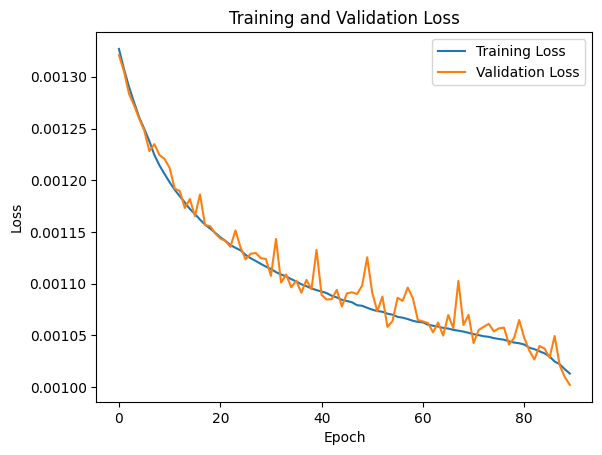

In [221]:
# Plot training and validation loss over epochs
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'][10:], label='Training Loss')
plt.plot(history3.history['val_loss'][10:], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
re_construct=sparse_autoencoder.predict(X_test)
mse = mean_squared_error(re_construct, X_test)
print("Mean Squared Error:", mse)
r2 = r2_score(re_construct, X_test)
print("R-squared:", r2)

6277/6277 [==============================] - 15s 2ms/step
Mean Squared Error: 0.0008443998640495611
R-squared: 0.9813852535463116


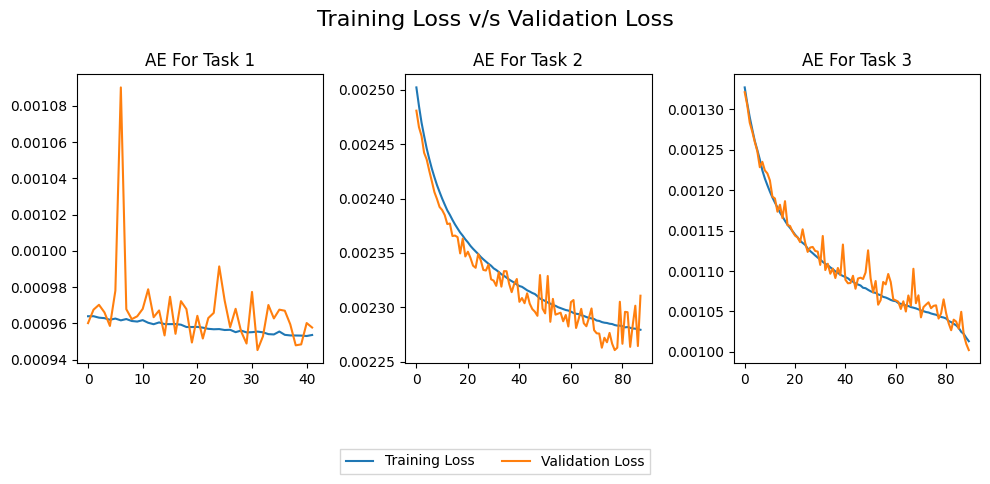

In [229]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the first graph
x1 = np.linspace(0, 10, 100)
y1 = np.sin(x1)

# Data for the second graph
x2 = np.linspace(0, 10, 100)
y2 = np.cos(x2)

# Create a figure with two subplots side by side
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10, 4))

# Plot the first graph on the first subplot
ax1.plot(history1.history['loss'][10:], label='Training Loss')
ax1.plot(history1.history['val_loss'][10:], label='Validation Loss')

ax1.set_title("AE For Task 1")


# Plot the second graph on the second subplot

ax2.plot(history2.history['loss'][10:], label='Training Loss')
ax2.plot(history2.history['val_loss'][10:], label='Validation Loss')


ax2.set_title('AE For Task 2')




ax3.plot(history3.history['loss'][10:], label='Training Loss')
ax3.plot(history3.history['val_loss'][10:], label='Validation Loss')

ax3.set_title('AE For Task 3')


# Add a common legend to all subplots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=False, shadow=False, ncol=3, numpoints=1)

fig.suptitle('Training Loss v/s Validation Loss', fontsize=16)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.savefig("AE_training.png", bbox_inches='tight')
# Show the plot
plt.show()


# Combining AEs for further use

In [119]:
'''
AE AE AE
COMBINE
RESHAPE
LSTM
LSTM
DENSE

A C S
'''

'\nAE AE AE\nCOMBINE\nRESHAPE\nLSTM\nLSTM\nDENSE\n\nA C S\n'

In [63]:
#loading AEs
from keras.models import load_model
Attack_AE = load_model('AE_for_Aattack.h5')
Category_AE = load_model('AE_for_category.h5')
Subcategory_AE = load_model('AE_for_subcategory.h5')

In [64]:
Attack_AE.summary(),Category_AE.summary(),Subcategory_AE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 attack_input (InputLayer)   [(None, 15)]              0         
                                                                 
 attack_encoder (Dense)      (None, 12)                192       
                                                                 
 attack_decoder (Dense)      (None, 15)                195       
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 category_input (InputLayer)  [(None, 13)]             0         
                                                                 
 category_encoder (Dense)    (None, 10)       

(None, None, None)

In [65]:
#converting non trainable
for l in Attack_AE.layers:
  l.trainable=False
for l in Category_AE.layers:
  l.trainable=False
for l in Subcategory_AE.layers:
  l.trainable=False

Attack_AE.summary(),Category_AE.summary(),Subcategory_AE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 attack_input (InputLayer)   [(None, 15)]              0         
                                                                 
 attack_encoder (Dense)      (None, 12)                192       
                                                                 
 attack_decoder (Dense)      (None, 15)                195       
                                                                 
Total params: 387
Trainable params: 0
Non-trainable params: 387
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 category_input (InputLayer)  [(None, 13)]             0         
                                                                 
 category_encoder (Dense)    (None, 10)       

(None, None, None)

In [66]:
#making the multiview input using the AEs
from keras.layers import Input, Dense, LSTM, Concatenate, Flatten, Reshape
from keras.models import Model
from tensorflow.keras.utils import plot_model

Attack_input=Attack_AE.input
Category_input=Category_AE.input
Subcategory_input=Subcategory_AE.input


Attack_encode=Attack_AE.get_layer('attack_encoder')(Attack_input)

Category_encode=Category_AE.get_layer('category_encoder')(Category_input)

Subcategory_encode=Subcategory_AE.get_layer('subcategory_encoder')(Subcategory_input)


combine_input = Concatenate(name='input_combine_layer')([Attack_encode,Category_encode,Subcategory_encode])

reshaped = Reshape((combine_input.shape[1], -1), name='reshape_layer')(combine_input)

temporal_layer1=LSTM(16,activation='relu', return_sequences=True,name='temporal_layer1')(reshaped)
temporal_layer2=LSTM(16,activation='relu', return_sequences=True, name='temporal_layer2')(temporal_layer1)


flatten_layer=Flatten()(temporal_layer2)



attack_combine_st = Concatenate(name='attack_combine_st')([Attack_encode,flatten_layer])
task_attack1=Dense(8,activation='relu',name='task_attack_dense1')(attack_combine_st)
task_attack1=Dense(4,activation='relu',name='task_attack_dense1')(attack_combine_st)
task_attack_output=Dense(1,activation='sigmoid',name='task_attack_output')(task_attack1)


category_combine_st = Concatenate(name='category_combine_st')([Category_encode,flatten_layer])
task_category0=Dense(32,activation='relu',name='task_category_dense0')(category_combine_st)
task_category1=Dense(16,activation='relu',name='task_category_dense1')(task_category0)
task_category_output=Dense(10,activation='softmax',name='task_category_output')(task_category1)


subcategory_combine_st = Concatenate(name='subcategory_combine_st')([Subcategory_encode,flatten_layer])
task_subcategory1=Dense(64,activation='relu',name='task_subcategory_dense1')(subcategory_combine_st)
task_subcategory2=Dense(32,activation='relu',name='task_subcategory_dense2')(task_subcategory1)
task_subcategory_output=Dense(19,activation='softmax',name='task_subcategory_output')(task_subcategory2)





model = Model(inputs=[Attack_input, Category_input, Subcategory_input], outputs=[task_attack_output, task_category_output, task_subcategory_output])
model.compile(optimizer='adam', loss={'task_attack_output': 'binary_crossentropy', 'task_category_output': 'sparse_categorical_crossentropy', 'task_subcategory_output': 'sparse_categorical_crossentropy'},
              metrics=['accuracy'])

model.summary()

plot_model(model)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attack_input (InputLayer)      [(None, 15)]         0           []                               
                                                                                                  
 category_input (InputLayer)    [(None, 13)]         0           []                               
                                                                                                  
 subcategory_input (InputLayer)  [(None, 17)]        0           []                               
                                                                                                  
 attack_encoder (Dense)         (None, 12)           192         ['attack_input[0][0]']           
                                                                                            

# Model Training

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('XIIOTID_selected.csv',low_memory=False)

In [69]:
from sklearn import preprocessing
def normalize_scale(X):
  m= X.values #returns a numpy array
  cols_name = X.columns
  scaler = preprocessing.MinMaxScaler()
  x_scaled = scaler.fit_transform(m)
  Scale_X = pd.DataFrame(x_scaled,columns = cols_name)
  return Scale_X

attack_selected_features=['Scr_IP', 'Des_pkts_ratio', 'Scr_port', 'Des_port', 'Avg_num_Proc/s',
       'Std_num_proc/s', 'Des_IP', 'is_privileged',
       'read_write_physical.process', 'Service', 'Avg_system_time', 'Des_pkts',
       'OSSEC_alert_level', 'Avg_nice_time', 'Succesful_login']


category_selected_features=['Des_port', 'Duration', 'Scr_ip_bytes', 'Scr_IP', 'Std_num_proc/s',
       'Scr_port', 'Avg_num_Proc/s', 'Des_IP', 'anomaly_alert', 'Is_SYN_ACK',
       'Scr_bytes', 'Des_pkts', 'is_SYN_with_RST']

subcategory_selected_features=['Scr_ip_bytes', 'Des_port', 'Std_num_proc/s', 'Scr_IP', 'Duration',
       'Avg_system_time', 'Des_pkts_ratio', 'Std_iowait_time', 'Scr_port',
       'Avg_num_Proc/s', 'Avg_kbmemused', 'read_write_physical.process',
       'File_activity', 'is_pure_ack', 'Des_IP', 'Des_bytes_ratio',
       'Conn_state']




AX_train, AX_test, Ay_train, Ay_test = train_test_split(normalize_scale(df[attack_selected_features]),df['class3'], test_size=0.2, random_state=42)
CX_train, CX_test, Cy_train, Cy_test = train_test_split(normalize_scale(df[category_selected_features]),df['class2'], test_size=0.2, random_state=42)
SX_train, SX_test, Sy_train, Sy_test = train_test_split(normalize_scale(df[subcategory_selected_features]),df['class1'], test_size=0.2, random_state=42)

In [70]:
AX_train.shape,CX_train.shape,SX_train.shape

((803350, 15), (803350, 13), (803350, 17))

# Training for Sub-category

In [74]:
# val_task_attack_output_accuracy, val_task_category_output_accuracy, val_task_subcategory_output_accuracy,
#based on 8 class multiclass classification
from keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_task_subcategory_output_loss',  patience=10, restore_best_weights=True)
modelcheckpoint=ModelCheckpoint('MVMTmodel2.h5', monitor='val_task_subcategory_output_loss', verbose=0, save_best_only=True)

history = model.fit([AX_train, CX_train, SX_train],  # List of input views
                    {'task_attack_output': Ay_train, 'task_category_output': Cy_train, 'task_subcategory_output': Sy_train},  # Dictionary of output tasks and their target labels
                    epochs=100,
                    # Number of training epochs
                    batch_size=256,     # Batch size
                    validation_split=0.3, callbacks=[early_stopping,modelcheckpoint])  # Validation data



Epoch 1/100
2197/2197 [==============================] - 597s 272ms/step - loss: 1.3319 - task_attack_output_loss: 0.2987 - task_category_output_loss: 0.5807 - task_subcategory_output_loss: 0.4522 - task_attack_output_accuracy: 0.9475 - task_category_output_accuracy: 0.8095 - task_subcategory_output_accuracy: 0.8539 - val_loss: 0.9204 - val_task_attack_output_loss: 0.2298 - val_task_category_output_loss: 0.3899 - val_task_subcategory_output_loss: 0.3004 - val_task_attack_output_accuracy: 0.9477 - val_task_category_output_accuracy: 0.8749 - val_task_subcategory_output_accuracy: 0.9016
Epoch 2/100
2197/2197 [==============================] - 600s 273ms/step - loss: 0.7871 - task_attack_output_loss: 0.2141 - task_category_output_loss: 0.3317 - task_subcategory_output_loss: 0.2409 - task_attack_output_accuracy: 0.9475 - task_category_output_accuracy: 0.8905 - task_subcategory_output_accuracy: 0.9195 - val_loss: 0.6738 - val_task_attack_output_loss: 0.2061 - val_task_category_output_loss: 0

In [129]:
pd.DataFrame(history.history).to_csv('training_log1.csv',index=False)

In [140]:
X=pd.read_csv('training_log1.csv')
X


,loss,task_attack_output_loss,task_category_output_loss,task_subcategory_output_loss,task_attack_output_accuracy,task_category_output_accuracy,task_subcategory_output_accuracy,val_loss,val_task_attack_output_loss,val_task_category_output_loss,val_task_subcategory_output_loss,val_task_attack_output_accuracy,val_task_category_output_accuracy,val_task_subcategory_output_accuracy
0,1.331942,0.298696,0.580660,0.452161,0.947454,0.809467,0.853878,0.920410,0.229750,0.389858,0.300378,0.947748,0.874899,0.901587
1,0.787145,0.214138,0.331658,0.240925,0.947454,0.890514,0.919494,0.673752,0.206059,0.275720,0.191549,0.947748,0.911653,0.936292
2,0.642210,0.206103,0.258244,0.177439,0.947454,0.913437,0.939400,0.559855,0.205097,0.210453,0.143881,0.947748,0.930391,0.951101
3,0.530349,0.205949,0.191695,0.132281,0.947454,0.935497,0.954450,0.481405,0.205095,0.167910,0.107975,0.947748,0.942806,0.963283
4,0.459286,0.205947,0.146487,0.106428,0.947454,0.952309,0.963622,0.449281,0.205094,0.139508,0.104256,0.947748,0.949901,0.961478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.215152,0.205950,0.004675,0.004103,0.947454,0.998782,0.998825,0.217478,0.205098,0.006103,0.005854,0.947748,0.998622,0.998892
66,0.215479,0.205946,0.004824,0.004284,0.947454,0.998721,0.998874,0.219220,0.205097,0.006551,0.007149,0.947748,0.998622,0.998473
67,0.214648,0.205950,0.004426,0.003848,0.947454,0.998814,0.998965,0.217032,0.205100,0.006192,0.005316,0.947748,0.998643,0.998988
68,0.214321,0.205950,0.004217,0.003730,0.947454,0.998867,0.998990,0.217475,0.205097,0.006087,0.005867,0.947748,0.998705,0.998959


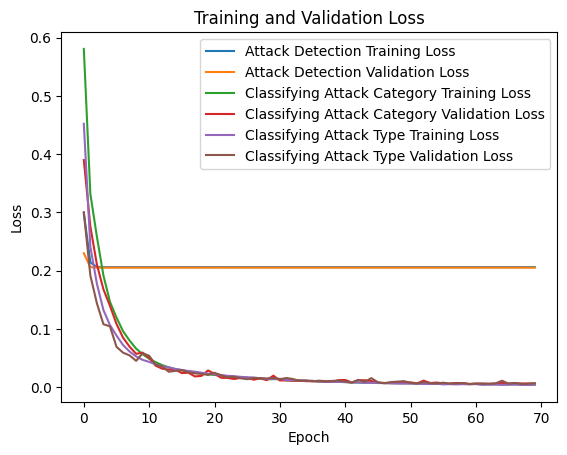

In [142]:
import matplotlib.pyplot as plt
plt.plot(X['task_attack_output_loss'], label='Attack Detection Training Loss')
plt.plot(X['val_task_attack_output_loss'], label='Attack Detection Validation Loss')

plt.plot(X['task_category_output_loss'], label='Classifying Attack Category Training Loss')
plt.plot(X['val_task_category_output_loss'], label='Classifying Attack Category Validation Loss')

plt.plot(X['task_subcategory_output_loss'], label='Classifying Attack Type Training Loss')
plt.plot(X['val_task_subcategory_output_loss'], label='Classifying Attack Type Validation Loss')






plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [75]:
from keras.models import load_model
MVMTmodel1 = load_model('MVMTmodel2.h5')
MVMTmodel1.evaluate([AX_test,CX_test,SX_test],[Ay_test,Cy_test,Sy_test])

6277/6277 [==============================] - 303s 48ms/step - loss: 0.2179 - task_attack_output_loss: 0.2082 - task_category_output_loss: 0.0046 - task_subcategory_output_loss: 0.0047 - task_attack_output_accuracy: 0.9467 - task_category_output_accuracy: 0.9989 - task_subcategory_output_accuracy: 0.9990


[0.21791072189807892,
 0.20819148421287537,
 0.004614562727510929,
 0.004675810690969229,
 0.9466734528541565,
 0.9988647699356079,
 0.9990240931510925]

In [78]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef,f1_score, recall_score, precision_score
def result_(predicted,y_test):
  # Actual=np.argmax(y_test, axis=1)
  Actual=y_test
  predictions=np.argmax(predicted,axis=1)


  print(classification_report(Actual, predictions))
  print('confusion matrix: \n',confusion_matrix(Actual, predictions))

  print('Accuracy:',accuracy_score(Actual, predictions))
  print('Precision', precision_score(Actual, predictions, average='weighted'))
  print('Recall:',recall_score(Actual, predictions, average='weighted'))


  print('F1-1', f1_score(Actual, predictions, average='weighted'))

  print('MCC:',matthews_corrcoef(Actual, predictions))
  return(predictions,y_test.values)


In [79]:
predicted=MVMTmodel1.predict([AX_test,CX_test,SX_test])

6277/6277 [==============================] - 259s 41ms/step


In [81]:
np.unique(Sy_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64)

In [82]:
print('For Multi-class classification:')
temp=result_(predicted[2],Sy_test)

For Multi-class classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10551
           1       1.00      1.00      1.00     10481
           2       1.00      1.00      1.00     10593
           3       1.00      1.00      1.00     10662
           4       1.00      1.00      1.00     10495
           5       1.00      1.00      1.00     10601
           6       1.00      1.00      1.00     10654
           7       1.00      1.00      1.00     10500
           8       1.00      1.00      1.00     10539
           9       1.00      1.00      1.00     10618
          10       1.00      1.00      1.00     10520
          11       1.00      0.99      0.99     10710
          12       1.00      1.00      1.00     10574
          13       1.00      1.00      1.00     10477
          14       1.00      1.00      1.00     10460
          15       0.99      1.00      1.00     10678
          16       1.00      1.00      1.00     1

# Training of category

In [83]:
from keras.models import load_model
MVMTmodel1 = load_model('MVMTmodel2.h5')


In [84]:
MVMTmodel1.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attack_input (InputLayer)      [(None, 15)]         0           []                               
                                                                                                  
 category_input (InputLayer)    [(None, 13)]         0           []                               
                                                                                                  
 subcategory_input (InputLayer)  [(None, 17)]        0           []                               
                                                                                                  
 attack_encoder (Dense)         (None, 12)           192         ['attack_input[0][0]']           
                                                                                            

In [85]:
layerS=['temporal_layer1', 'temporal_layer2', 'subcategory_encoder', 'task_subcategory_dense1', 'task_subcategory_dense2', 'task_subcategory_output']

for i in MVMTmodel1.layers:
  if i.name in layerS:
    i.trainable = False



for i in MVMTmodel1.layers:
  if i.trainable == False:

    print(i.name)

MVMTmodel1.summary()

attack_encoder
category_encoder
subcategory_encoder
temporal_layer1
temporal_layer2
task_subcategory_dense1
task_subcategory_dense2
task_subcategory_output
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attack_input (InputLayer)      [(None, 15)]         0           []                               
                                                                                                  
 category_input (InputLayer)    [(None, 13)]         0           []                               
                                                                                                  
 subcategory_input (InputLayer)  [(None, 17)]        0           []                               
                                                                                                  
 attack_encoder (Dense)         (No

In [86]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_task_category_output_loss',  patience=10, restore_best_weights=True)
modelcheckpoint=ModelCheckpoint('MVMTmodel3.h5', monitor='val_task_category_output_loss', verbose=0, save_best_only=True)



history1 = MVMTmodel1.fit([AX_train, CX_train, SX_train],  # List of input views
                    {'task_attack_output': Ay_train, 'task_category_output': Cy_train, 'task_subcategory_output': Sy_train},  # Dictionary of output tasks and their target labels
                    epochs=100,
                    # Number of training epochs
                    batch_size=256,     # Batch size
                    validation_split=0.3, callbacks=[early_stopping,modelcheckpoint])  # Validation data



Epoch 1/100
2197/2197 [==============================] - 589s 267ms/step - loss: 0.2165 - task_attack_output_loss: 0.2059 - task_category_output_loss: 0.0052 - task_subcategory_output_loss: 0.0049 - task_attack_output_accuracy: 0.9475 - task_category_output_accuracy: 0.9986 - task_subcategory_output_accuracy: 0.9986 - val_loss: 0.2186 - val_task_attack_output_loss: 0.2051 - val_task_category_output_loss: 0.0066 - val_task_subcategory_output_loss: 0.0064 - val_task_attack_output_accuracy: 0.9477 - val_task_category_output_accuracy: 0.9987 - val_task_subcategory_output_accuracy: 0.9986
Epoch 2/100
2197/2197 [==============================] - 584s 266ms/step - loss: 0.2152 - task_attack_output_loss: 0.2059 - task_category_output_loss: 0.0047 - task_subcategory_output_loss: 0.0041 - task_attack_output_accuracy: 0.9475 - task_category_output_accuracy: 0.9988 - task_subcategory_output_accuracy: 0.9988 - val_loss: 0.2185 - val_task_attack_output_loss: 0.2051 - val_task_category_output_loss: 0

In [89]:
pd.DataFrame(history1.history).to_csv('training_log2.csv',index=False)

In [147]:
Y=pd.read_csv('training_log2.csv')

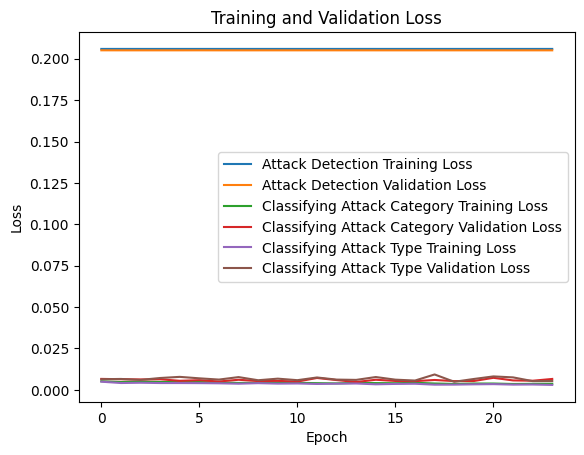

In [151]:
import matplotlib.pyplot as plt
plt.plot(Y['task_attack_output_loss'], label='Attack Detection Training Loss')
plt.plot(Y['val_task_attack_output_loss'], label='Attack Detection Validation Loss')

plt.plot(Y['task_category_output_loss'], label='Classifying Attack Category Training Loss')
plt.plot(Y['val_task_category_output_loss'], label='Classifying Attack Category Validation Loss')

plt.plot(Y['task_subcategory_output_loss'], label='Classifying Attack Type Training Loss')
plt.plot(Y['val_task_subcategory_output_loss'], label='Classifying Attack Type Validation Loss')






plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [87]:
from keras.models import load_model
MVMTmodel_asc = load_model('MVMTmodel3.h5')
MVMTmodel_asc.evaluate([AX_test,CX_test,SX_test],[Ay_test,Cy_test,Sy_test])

6277/6277 [==============================] - 305s 49ms/step - loss: 0.2183 - task_attack_output_loss: 0.2082 - task_category_output_loss: 0.0040 - task_subcategory_output_loss: 0.0057 - task_attack_output_accuracy: 0.9467 - task_category_output_accuracy: 0.9990 - task_subcategory_output_accuracy: 0.9988


[0.2183123379945755,
 0.20819900929927826,
 0.003961676731705666,
 0.00572874816134572,
 0.9466734528541565,
 0.9990440011024475,
 0.9988000392913818]

In [91]:
predicted=MVMTmodel_asc.predict([AX_test,CX_test,SX_test])
print('For Multi-class classification:')
temp=result_(predicted[1],Cy_test)

6277/6277 [==============================] - 261s 41ms/step
For Multi-class classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10481
           1       1.00      1.00      1.00     10495
           2       1.00      1.00      1.00     21095
           3       1.00      1.00      1.00     31737
           4       1.00      0.99      0.99     10710
           5       1.00      1.00      1.00     10574
           6       1.00      1.00      1.00     42315
           7       1.00      1.00      1.00     21255
           8       1.00      1.00      1.00     31718
           9       1.00      1.00      1.00     10458

    accuracy                           1.00    200838
   macro avg       1.00      1.00      1.00    200838
weighted avg       1.00      1.00      1.00    200838

confusion matrix: 
 [[10478     3     0     0     0     0     0     0     0     0]
 [    0 10495     0     0     0     0     0     0     0     0]
 [ 

In [92]:
predicted=MVMTmodel_asc.predict([AX_test,CX_test,SX_test])
print('For Multi-class classification:')
temp=result_(predicted[2],Sy_test)

6277/6277 [==============================] - 262s 42ms/step
For Multi-class classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10551
           1       1.00      1.00      1.00     10481
           2       1.00      1.00      1.00     10593
           3       1.00      1.00      1.00     10662
           4       1.00      1.00      1.00     10495
           5       1.00      1.00      1.00     10601
           6       1.00      1.00      1.00     10654
           7       1.00      1.00      1.00     10500
           8       1.00      1.00      1.00     10539
           9       1.00      1.00      1.00     10618
          10       1.00      1.00      1.00     10520
          11       1.00      0.99      0.99     10710
          12       1.00      1.00      1.00     10574
          13       1.00      1.00      1.00     10477
          14       1.00      1.00      1.00     10460
          15       0.99      1.00      1.00

In [94]:
MVMTmodel_asc.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attack_input (InputLayer)      [(None, 15)]         0           []                               
                                                                                                  
 category_input (InputLayer)    [(None, 13)]         0           []                               
                                                                                                  
 subcategory_input (InputLayer)  [(None, 17)]        0           []                               
                                                                                                  
 attack_encoder (Dense)         (None, 12)           192         ['attack_input[0][0]']           
                                                                                            

In [95]:
MVMTmodel_asc = load_model('MVMTmodel3.h5')

layerS=['category_encoder','subcategory_encoder','temporal_layer1', 'temporal_layer2', 'task_subcategory_dense1', 'task_subcategory_dense2', 'task_subcategory_output', 'task_category_dense0', 'task_category_dense1', 'task_category_dense2', 'task_category_output']

for i in MVMTmodel_asc.layers:
  if i.name in layerS:
    i.trainable = False

for i in MVMTmodel_asc.layers:
  if i.trainable == False:

    print(i.name)

MVMTmodel_asc.summary()

attack_encoder
category_encoder
subcategory_encoder
temporal_layer1
temporal_layer2
task_category_dense0
task_subcategory_dense1
task_category_dense1
task_subcategory_dense2
task_category_output
task_subcategory_output
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attack_input (InputLayer)      [(None, 15)]         0           []                               
                                                                                                  
 category_input (InputLayer)    [(None, 13)]         0           []                               
                                                                                                  
 subcategory_input (InputLayer)  [(None, 17)]        0           []                               
                                                                       

In [96]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_task_attack_output_loss',  patience=10, restore_best_weights=False)
modelcheckpoint=ModelCheckpoint('MVMTmodel4.h5', monitor='val_task_attack_output_loss', verbose=0, save_best_only=True)



history2 = MVMTmodel_asc.fit([AX_train, CX_train, SX_train],  # List of input views
                    {'task_attack_output': Ay_train, 'task_category_output': Cy_train, 'task_subcategory_output': Sy_train},  # Dictionary of output tasks and their target labels
                    epochs=100,
                    # Number of training epochs
                    batch_size=256,     # Batch size
                    validation_split=0.3, callbacks=[early_stopping,modelcheckpoint])  # Validation data








Epoch 1/100
2197/2197 [==============================] - 592s 269ms/step - loss: 0.2142 - task_attack_output_loss: 0.2059 - task_category_output_loss: 0.0042 - task_subcategory_output_loss: 0.0036 - task_attack_output_accuracy: 0.9475 - task_category_output_accuracy: 0.9989 - task_subcategory_output_accuracy: 0.9990 - val_loss: 0.2378 - val_task_attack_output_loss: 0.2051 - val_task_category_output_loss: 0.0166 - val_task_subcategory_output_loss: 0.0158 - val_task_attack_output_accuracy: 0.9477 - val_task_category_output_accuracy: 0.9951 - val_task_subcategory_output_accuracy: 0.9957
Epoch 2/100
2197/2197 [==============================] - 591s 269ms/step - loss: 0.2144 - task_attack_output_loss: 0.2059 - task_category_output_loss: 0.0043 - task_subcategory_output_loss: 0.0038 - task_attack_output_accuracy: 0.9475 - task_category_output_accuracy: 0.9988 - task_subcategory_output_accuracy: 0.9990 - val_loss: 0.2158 - val_task_attack_output_loss: 0.2051 - val_task_category_output_loss: 0

In [97]:
from keras.models import load_model
MVMTmodel_aCSC = load_model('MVMTmodel4.h5')
MVMTmodel_aCSC.evaluate([AX_test,CX_test,SX_test],[Ay_test,Cy_test,Sy_test])

6277/6277 [==============================] - 307s 49ms/step - loss: 0.0165 - task_attack_output_loss: 0.0055 - task_category_output_loss: 0.0045 - task_subcategory_output_loss: 0.0062 - task_attack_output_accuracy: 0.9988 - task_category_output_accuracy: 0.9992 - task_subcategory_output_accuracy: 0.9991


[0.016512615606188774,
 0.005466149654239416,
 0.004454815294593573,
 0.006167808547616005,
 0.9988498091697693,
 0.9991535544395447,
 0.9991485476493835]

In [143]:
# later for graph
pd.DataFrame(history2.history).to_csv('training_log3.csv',index=False)

In [149]:
Z=pd.read_csv('training_log3.csv')

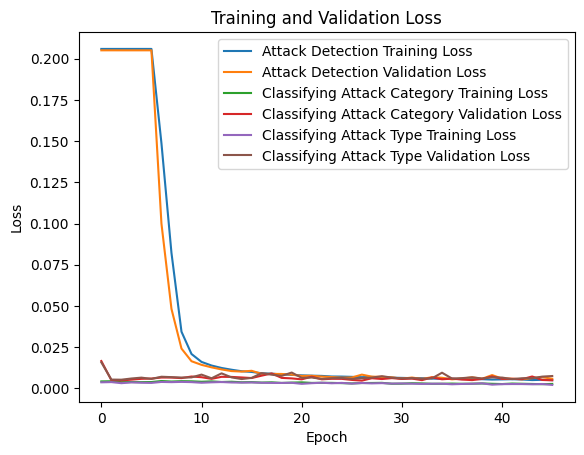

In [154]:
import matplotlib.pyplot as plt
plt.plot(Z['task_attack_output_loss'], label='Attack Detection Training Loss')
plt.plot(Z['val_task_attack_output_loss'], label='Attack Detection Validation Loss')

plt.plot(Z['task_category_output_loss'], label='Classifying Attack Category Training Loss')
plt.plot(Z['val_task_category_output_loss'], label='Classifying Attack Category Validation Loss')

plt.plot(Z['task_subcategory_output_loss'], label='Classifying Attack Type Training Loss')
plt.plot(Z['val_task_subcategory_output_loss'], label='Classifying Attack Type Validation Loss')






plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [233]:
predicted=MVMTmodel_aCSC.predict([AX_test,CX_test,SX_test])

6277/6277 [==============================] - 281s 45ms/step


In [236]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef,f1_score, recall_score, precision_score
def result_(predicted,y_test):
  # Actual=np.argmax(y_test, axis=1)
  Actual=y_test
  predictions=np.argmax(predicted,axis=1)


  print(classification_report(Actual, predictions,digits=5))
  print('confusion matrix: \n',confusion_matrix(Actual, predictions))

  print('Accuracy:',accuracy_score(Actual, predictions))
  print('Precision', precision_score(Actual, predictions, average='weighted'))
  print('Recall:',recall_score(Actual, predictions, average='weighted'))


  print('F1-1', f1_score(Actual, predictions, average='weighted'))

  print('MCC:',matthews_corrcoef(Actual, predictions))



def result_B(predicted,y_test):
  # Actual=np.argmax(y_test, axis=1)
  # predictions=np.argmax(predicted,axis=1)
  Actual=y_test
  predictions=[]
  for i in predicted:
    if i>=0.5:
      predictions.append(1)
    else:
      predictions.append(0)




  print(classification_report(Actual, predictions))
  print('confusion matrix: \n',confusion_matrix(Actual, predictions))

  print('Accuracy:',accuracy_score(Actual, predictions))
  print('Precision', precision_score(Actual, predictions, average='weighted'))
  print('Recall:',recall_score(Actual, predictions, average='weighted'))


  print('F1-1', f1_score(Actual, predictions, average='weighted'))

  print('MCC:',matthews_corrcoef(Actual, predictions))

In [103]:
print('For Binary classification: Attack Label Classification\n')
result_B(predicted[0],Ay_test)

For Binary classification: Attack Label Classification

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190128
           1       1.00      0.98      0.99     10710

    accuracy                           1.00    200838
   macro avg       1.00      0.99      0.99    200838
weighted avg       1.00      1.00      1.00    200838

confusion matrix: 
 [[190086     42]
 [   189  10521]]
Accuracy: 0.9988498192573119
Precision 0.998847636014781
Recall: 0.9988498192573119
F1-1 0.9988460675198205
MCC: 0.9885602606116


In [237]:
print('For Multi-class classification: Category Classification\n')
result_(predicted[1],Cy_test)

For Multi-class classification: Category Classification

              precision    recall  f1-score   support

           0    0.99876   1.00000   0.99938     10481
           1    0.99990   0.99971   0.99981     10495
           2    0.99943   1.00000   0.99972     21095
           3    0.99727   0.99962   0.99844     31737
           4    0.99934   0.98777   0.99352     10710
           5    0.99972   1.00000   0.99986     10574
           6    0.99936   0.99950   0.99943     42315
           7    0.99958   0.99995   0.99976     21255
           8    0.99975   0.99994   0.99984     31718
           9    0.99971   1.00000   0.99986     10458

    accuracy                        0.99915    200838
   macro avg    0.99928   0.99865   0.99896    200838
weighted avg    0.99915   0.99915   0.99915    200838

confusion matrix: 
 [[10481     0     0     0     0     0     0     0     0     0]
 [    0 10492     1     0     0     0     2     0     0     0]
 [    0     0 21095     0     0     0 

In [238]:
print('For Multi-class classification: Sub-Category Classification\n')
result_(predicted[2],Sy_test)

For Multi-class classification: Sub-Category Classification

              precision    recall  f1-score   support

           0    0.99981   1.00000   0.99991     10551
           1    0.99848   1.00000   0.99924     10481
           2    0.99972   1.00000   0.99986     10593
           3    0.99813   0.99991   0.99902     10662
           4    0.99990   1.00000   0.99995     10495
           5    0.99981   1.00000   0.99991     10601
           6    0.99944   0.99916   0.99930     10654
           7    0.99924   0.99886   0.99905     10500
           8    0.99811   0.99972   0.99891     10539
           9    0.99953   1.00000   0.99976     10618
          10    1.00000   1.00000   1.00000     10520
          11    0.99925   0.98889   0.99404     10710
          12    0.99962   0.99991   0.99976     10574
          13    1.00000   0.99981   0.99990     10477
          14    0.99962   0.99857   0.99909     10460
          15    0.99376   0.99916   0.99645     10678
          16    0.99

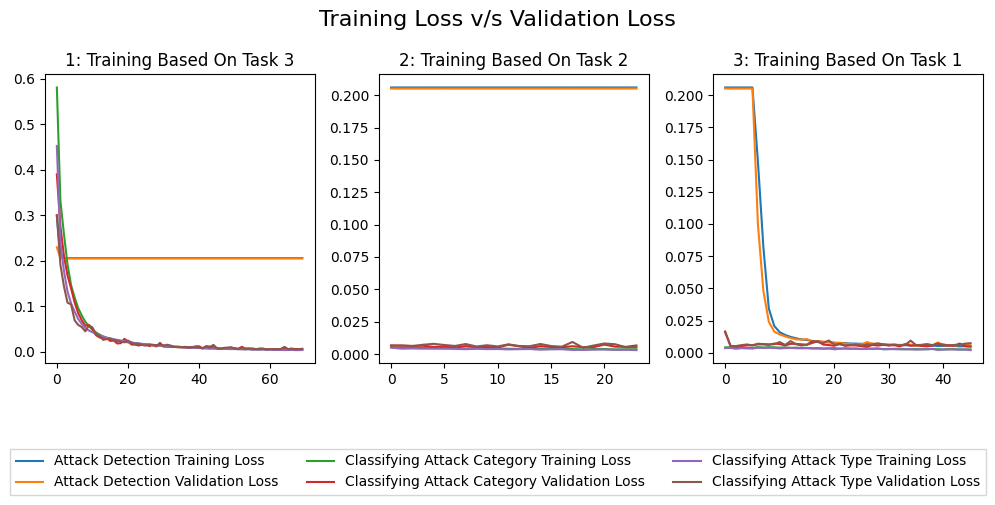

In [227]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots side by side
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10, 4))

# Plot the first graph on the first subplot
line1=ax1.plot(X['task_attack_output_loss'], label='Attack Detection Training Loss')
line2=ax1.plot(X['val_task_attack_output_loss'], label='Attack Detection Validation Loss')

line1=ax1.plot(X['task_category_output_loss'], label='Classifying Attack Category Training Loss')
line2=ax1.plot(X['val_task_category_output_loss'], label='Classifying Attack Category Validation Loss')

line1=ax1.plot(X['task_subcategory_output_loss'], label='Classifying Attack Type Training Loss')
line2=ax1.plot(X['val_task_subcategory_output_loss'], label='Classifying Attack Type Validation Loss')

ax1.set_title("1: Training Based On Task 3")
# ax1.legend()

# Plot the second graph on the second subplot
line1=ax2.plot(Y['task_attack_output_loss'], label='Attack Detection Training Loss')
line2=ax2.plot(Y['val_task_attack_output_loss'], label='Attack Detection Validation Loss')

line1=ax2.plot(Y['task_category_output_loss'], label='Classifying Attack Category Training Loss')
line2=ax2.plot(Y['val_task_category_output_loss'], label='Classifying Attack Category Validation Loss')

line1=ax2.plot(Y['task_subcategory_output_loss'], label='Classifying Attack Type Training Loss')
line2=ax2.plot(Y['val_task_subcategory_output_loss'], label='Classifying Attack Type Validation Loss')
ax2.set_title('2: Training Based On Task 2')
# ax2.legend()

line1=ax3.plot(Z['task_attack_output_loss'], label='Attack Detection Training Loss')
line2=ax3.plot(Z['val_task_attack_output_loss'], label='Attack Detection Validation Loss')

line1=ax3.plot(Z['task_category_output_loss'], label='Classifying Attack Category Training Loss')
line2=ax3.plot(Z['val_task_category_output_loss'], label='Classifying Attack Category Validation Loss')

line1=ax3.plot(Z['task_subcategory_output_loss'], label='Classifying Attack Type Training Loss')
line2=ax3.plot(Z['val_task_subcategory_output_loss'], label='Classifying Attack Type Validation Loss')
ax3.set_title('3: Training Based On Task 1')
# ax3.legend()

# Add a common legend to all subplots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=False, shadow=False, ncol=3, numpoints=1)

fig.suptitle('Training Loss v/s Validation Loss', fontsize=16)

# Adjust layout to prevent clipping of labels
plt.tight_layout()


plt.savefig(r"model_training.png", bbox_inches='tight')
# Show the plot
plt.show()

End

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.preprocessing import image

In [ ]:
import pickle

In [ ]:
(X_train, _),(X_test, _) =mnist.load_data()

Just to prac without internet

In [ ]:
mnist_data=mnist.load_data()

In [ ]:
with open('mnist_data.pickle', 'wb') as f:
    pickle.dump(mnist_data, f)

In [ ]:
with open('mnist_data.pickle', 'rb') as f:
     mnist_data = pickle.load(f)

In [ ]:
np.shape(mnist_data)

It Ends here

In [ ]:
np.shape(X_train),np.shape(X_test)

In [ ]:
np.shape(X_test)[1]*np.shape(X_test)[2]

In [ ]:
len(X_test)

In [ ]:
#for grey scale images

def preprocess(X):
    X=X/255.0
    vector_form=np.shape(X)[1]*np.shape(X)[2]
    X=X.reshape(len(X),vector_form)
    return X

In [ ]:
X_train=preprocess(X_train)
X_test=preprocess(X_test)

In [ ]:
def show_data(X,n=10,height=28,width=28,title=' '):
    plt.figure(figsize=(10,3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title,fontsize = 20)

In [ ]:
show_data(X_train,title='Training Dataset')
show_data(X_test,title='Testing Dataset')

In [ ]:
#building AutoEncode
#desire_dim = np.shape(X_test)[1]*np.shape(X_test)[2]

input_dim, output_dim = 784, 784
encode_dim=100
hidden_dim=256

In [ ]:
#encoder
input_layer = Input(shape=(input_dim,),name='INPUT')
hidden_layer_1 = Dense(hidden_dim,activation='relu',name='Hidden_1')(input_layer)
encodor= =========================
#code

dense()(encoder)
code_layer = Dense(encode_dim,activation='relu',name='CODE_LAYER')(hidden_layer_1)


#decoder
hidden_layer_2 = Dense(hidden_dim,activation='relu',name='Hidden_2')(code_layer)
output_layer = Dense(output_dim,activation='sigmoid',name='OUTPUT_LAYER')(hidden_layer_2)

In [ ]:
AE_model = Model(input_layer,output_layer,name='AE_model')
AE_model.compile(optimizer='adam',loss='binary_crossentropy')
AE_model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


In [ ]:

AE_model.fit(X_train,X_train,validation_split=0.20,use_multiprocessing=True, epochs=20, callbacks=[early_stop])

In [ ]:
decode_data = AE_model.predict(X_test)

In [ ]:
encoded_data_model = Model(inputs=AE_model.input,outputs=AE_model.get_layer("CODE_LAYER").output)

In [ ]:
code_data=encoded_data_model.predict(X_test)

In [ ]:
show_data(X_test,title='Original Data')
show_data(code_data,height=10,width=10,title='coded data')
show_data(decode_data,title='Decoded Data')

In [ ]:
code_data

In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
# from keras.datasets import mnist
import matplotlib.pyplot as plt


In [ ]:
encoding_dim = 32
#decoding_dim =

input_img = Input(shape=(784,))

#encoder
encoder = Dense(encoding_dim, activation='relu', name='encoder_layer')(input_img)


#decoder
decoder = Dense(784, activation='sigmoid', name='decoder_layer')(encoder)

AE = Model(input_img,decoder, name = 'AEMODEl')

AE.compile(optimizer='adadelta', loss='binary_crossentropy')







#encoder
encoder = Model(input_img, encoder)


encoder_input = Input(shape=(encoding_dim,))

decoder_layer = AE.layers[-1]




decoder = Model(encoder_input, decoder_layer(encoder_input))





In [ ]:
AE.summary()

In [ ]:
X_train, X_train

In [ ]:
AE.fit(X_train, X_train, epochs=20, batch_size=32, shuffle=True, validation_data=(X_test,X_test))


In [ ]:
encoded_img=encoder.predict(X_test)
decoded_img=decoder.predict(encoded_img)

In [ ]:
n = 20
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_img[i].reshape(28,28))
    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

In [ ]:
#dataframe.to_csv('ecg.csv',index=False)

In [ ]:
dataframe = pd.read_csv('ecg.csv')
raw_data = dataframe.values
dataframe.head()

In [ ]:
raw_data

In [ ]:
dataframe.iloc[:,-1].unique()

In [ ]:
from sklearn.model_selection import train_test_split


labels = raw_data[:, -1]
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

In [ ]:
labels,  train_labels, test_labels

In [ ]:
train_data

In [ ]:
data

In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [ ]:
min_val.eval

In [ ]:
max_val

In [ ]:
train_data

In [ ]:
test_data

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [ ]:
train_labels

In [ ]:
test_labels

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
normal_train_data[0]

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

In [ ]:
from keras.models import Model
from keras import layers
# import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose

In [ ]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [ ]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='green')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [ ]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='green')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)


threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)


reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)



def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
    print("Accuracy = {}".format(accuracy_score(labels, predictions)))
    print("Precision = {}".format(precision_score(labels, predictions)))
    print("Recall = {}".format(recall_score(labels, predictions)))


preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

In [ ]:
UNSW_2018_IoT_Botnet_Dataset_55

In [ ]:
# netdata = pd.read_csv(r'C:\Users\rnlab\Downloads\UNSW_2018_IoT_Botnet_Dataset_1.csv',header=None, names=column_names)
netdata = pd.read_csv(r'C:\Users\rnlab\Downloads\DDoS_HTTP.csv',delimiter=';')

In [ ]:
len(column_names)

In [ ]:
# netdata = pd.read_csv(r'C:\Users\rnlab\Downloads\UNSW_2018_IoT_Botnet_Dataset_1.csv',header=None, names=column_names)
netdata = pd.read_csv(r'C:\Users\rnlab\Downloads\UNSW_2018_IoT_Botnet_Full5pc_1.csv')
netdata

In [ ]:
netdata.iloc[:,-1].value_counts()

In [ ]:
netdata.iloc[:,-2].value_counts()

In [ ]:
netdata.iloc[:,-3].value_counts()

In [ ]:
netdata.iloc[0,:], column_names

In [ ]:
netdata

In [ ]:
netdata.columns

In [ ]:
column_names

In [ ]:
netdata.shape

In [ ]:
netdata.shape

In [ ]:
netdata.iloc[:,-1].unique(),netdata.iloc[:,-2].unique(),netdata.iloc[:,-3].unique()

In [ ]:
netdata.iloc[:,-1].unique(),netdata.iloc[:,-2].unique(),netdata.iloc[:,-3].unique()

In [ ]:
netdata.iloc[:,-3].value_counts()

In [ ]:
np.array(netdata)[0]

#I will use sparse autoencoder as it introduces sparsity constraints,

meaning only a small number of neurons in the hidden layer are activated during the encoding process.

so This might helps in learning more robust and informative features.

In [ ]:
# Generate some example data
np.random.seed(42)
data = np.random.rand(1000, 20)  # 1000 samples of 20-dimensional data


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers


# Define the sparse autoencoder
input_data = Input(shape=(20,))
encoded = Dense(10, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_data)
decoded = Dense(20, activation='sigmoid')(encoded)



sparse_autoencoder = Model(input_data, decoded)
sparse_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

sparse_autoencoder.summary()

Model: "model_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_45 (InputLayer)       [(None, 20)]              0         
                                                                 
 dense_102 (Dense)           (None, 10)                210       
                                                                 
 dense_103 (Dense)           (None, 20)                220       
                                                                 
Total params: 430
Trainable params: 430
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the sparse autoencoder
sparse_autoencoder.fit(data, data, epochs=50, batch_size=32)

Epoch 1/50
32/32 [==============================] - 0s 640us/step - loss: 0.0864
Epoch 2/50
32/32 [==============================] - 0s 791us/step - loss: 0.0827
Epoch 3/50
32/32 [==============================] - 0s 819us/step - loss: 0.0812
Epoch 4/50
32/32 [==============================] - 0s 769us/step - loss: 0.0800
Epoch 5/50
32/32 [==============================] - 0s 942us/step - loss: 0.0785
Epoch 6/50
32/32 [==============================] - 0s 829us/step - loss: 0.0768
Epoch 7/50
32/32 [==============================] - 0s 750us/step - loss: 0.0751
Epoch 8/50
32/32 [==============================] - 0s 960us/step - loss: 0.0734
Epoch 9/50
32/32 [==============================] - 0s 848us/step - loss: 0.0718
Epoch 10/50
32/32 [==============================] - 0s 746us/step - loss: 0.0703
Epoch 11/50
32/32 [==============================] - 0s 795us/step - loss: 0.0689
Epoch 12/50
32/32 [==============================] - 0s 869us/step - loss: 0.0677
Epoch 13/50
32/32 [======

In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
def Missing_handling(df):
    n=df.shape[1]
    for i in range(n):
        if df.iloc[:,i].isnull().sum()>0:
            if df.iloc[:,i].dtype == 'object':
                df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].mode()[0])
            else:
                df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].mean())
    return df

def encod(data):
    n=data.shape[1]
    #from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    for i in range(n):
        if data.iloc[:,i].dtype == 'object':
            data.iloc[:,i]= label_encoder.fit_transform(data.iloc[:,i])
    return data

def normalize_scale (X):
    m= X.values #returns a numpy array
    cols_name = X.columns
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(m)
    Scale_X = pd.DataFrame(x_scaled,columns = cols_name)
    return Scale_X
def data_preprocessing(data,c):
    data1 = Missing_handling(data)
    data2 = encod(data1)
    X=data.drop([c],axis=1)
    y = data[c]
    data3 = normalize_scale(X)
    return data3,y

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd

# Generate some example data
np.random.seed(42)
data = np.random.rand(1000, 20)  # 1000 samples of 20-dimensional data

In [ ]:
data=pd.read_csv(r'C:\Users\rnlab\Downloads\UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')
#data=data.values

In [ ]:
data

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,1132803,udp,192.168.100.149,56044,192.168.100.5,80,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1,DoS,UDP
2934813,3384621,udp,192.168.100.150,21546,192.168.100.3,80,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1,DDoS,UDP
2934814,775893,udp,192.168.100.149,30897,192.168.100.5,80,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1,DoS,UDP
2934815,443484,tcp,192.168.100.147,36904,192.168.100.7,80,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1,DoS,TCP


In [ ]:
data=data.iloc[:,:-3]


In [ ]:
data=normalize_scale(data)

In [ ]:
data=data.values

In [ ]:
np.shape(data)

(2934817, 13)

In [ ]:
data

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.52475643, 0.43194502,
        0.29122914],
       [0.61185289, 0.13949386, 0.29214465, ..., 0.09767211, 0.68423303,
        0.44015249],
       [0.12203823, 0.49517691, 0.03438852, ..., 0.19598286, 0.04522729,
        0.32533033],
       ...,
       [0.09196457, 0.5753817 , 0.97809812, ..., 0.87720334, 0.41430041,
        0.5021281 ],
       [0.52208381, 0.19409454, 0.68948916, ..., 0.24350626, 0.09000794,
        0.44208302],
       [0.88996012, 0.46754026, 0.84971304, ..., 0.30369847, 0.44332001,
        0.17226481]])

In [ ]:
data

array([[3142762, 'udp', '192.168.100.150', ..., 1, 'DDoS', 'UDP'],
       [2432264, 'tcp', '192.168.100.150', ..., 1, 'DDoS', 'TCP'],
       [1976315, 'tcp', '192.168.100.147', ..., 1, 'DDoS', 'TCP'],
       ...,
       [775893, 'udp', '192.168.100.149', ..., 1, 'DoS', 'UDP'],
       [443484, 'tcp', '192.168.100.147', ..., 1, 'DoS', 'TCP'],
       [96906, 'tcp', '192.168.100.150', ..., 1, 'DoS', 'TCP']],
      dtype=object)

Epoch 1/50
73371/73371 [==============================] - 68s 919us/step - loss: 0.0021 - val_loss: 0.0012
Epoch 2/50
73371/73371 [==============================] - 67s 913us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/50
73371/73371 [==============================] - 67s 917us/step - loss: 0.0010 - val_loss: 9.4764e-04
Epoch 4/50
73371/73371 [==============================] - 67s 914us/step - loss: 9.2341e-04 - val_loss: 9.0341e-04
Epoch 5/50
73371/73371 [==============================] - 66s 904us/step - loss: 8.9824e-04 - val_loss: 9.0232e-04
Epoch 6/50
73371/73371 [==============================] - 68s 927us/step - loss: 8.8307e-04 - val_loss: 8.7814e-04
Epoch 7/50
73371/73371 [==============================] - 68s 922us/step - loss: 8.6788e-04 - val_loss: 8.6636e-04
Epoch 8/50
73371/73371 [==============================] - 68s 923us/step - loss: 8.4951e-04 - val_loss: 8.3304e-04
Epoch 9/50
73371/73371 [==============================] - 67s 911us/step - loss: 8.3950e-04 - val_lo

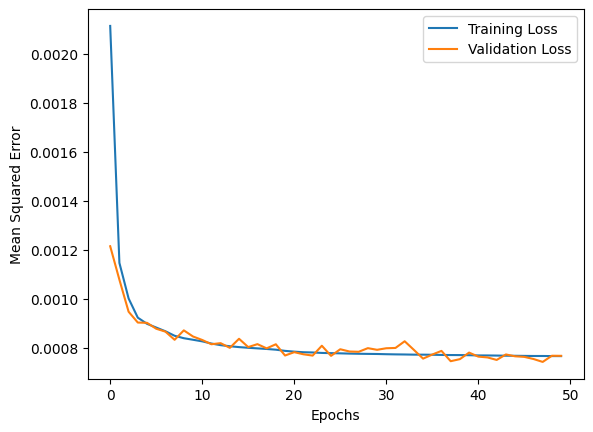

91714/91714 [==============================] - 53s 579us/step


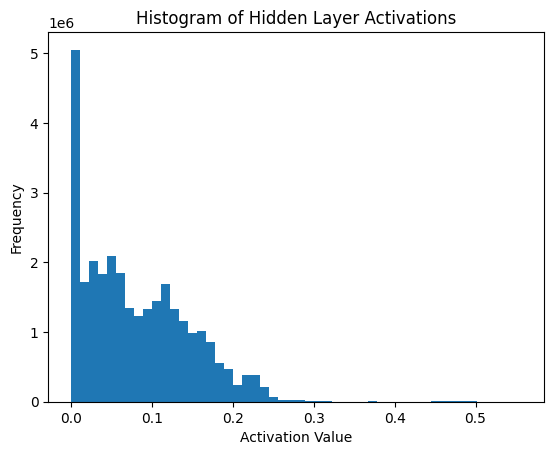

Average Activation of Hidden Neurons:
[0.12642132 0.08160311 0.08482731 0.08041511 0.05425313 0.05488319
 0.07870985 0.09416991 0.07907613 0.07486469]


In [ ]:


# Define the sparse autoencoder
input_data = Input(shape=(13,))
encoded = Dense(10, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5))(input_data)


decoded = Dense(13, activation='sigmoid')(encoded)

sparse_autoencoder = Model(input_data, decoded)
sparse_autoencoder.compile(optimizer='adam', loss='mean_squared_error')



# Train the sparse autoencoder
history = sparse_autoencoder.fit(data, data, epochs=50, batch_size=32, validation_split=0.2)




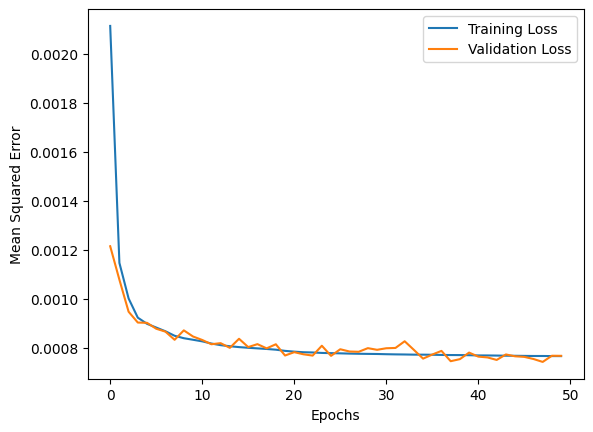

91714/91714 [==============================] - 54s 593us/step


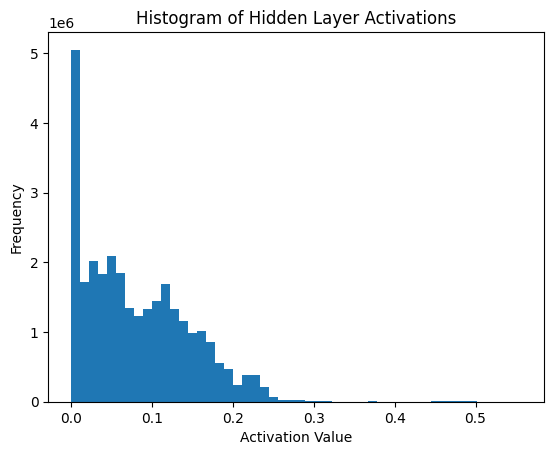

Average Activation of Hidden Neurons:
[0.12642132 0.08160311 0.08482731 0.08041511 0.05425313 0.05488319
 0.07870985 0.09416991 0.07907613 0.07486469]


In [ ]:
# Visualize the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Calculate the average activation of neurons in the hidden layer
activation_layer = Model(inputs=sparse_autoencoder.input,
                         outputs=sparse_autoencoder.get_layer(index=1).output)

hidden_activations = activation_layer.predict(data)
average_activation = np.mean(hidden_activations, axis=0)

# Plot a histogram of the hidden layer activations
plt.hist(hidden_activations.flatten(), bins=50)
plt.xlabel('Activation Value')
plt.ylabel('Frequency')
plt.title('Histogram of Hidden Layer Activations')
plt.show()

print("Average Activation of Hidden Neurons:")
print(average_activation)